# Week 2

In [1]:
# %conda install numpy
# %conda install matplotlib
%conda install pandas
%conda install scikit-learn

2 channel Terms of Service accepted
Retrieving notices: done
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/miniconda3

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2025.11.12         |  py313hca03da5_0         154 KB
    ------------------------------------------------------------
                                           Total:         154 KB

The following packages will be UPDATED:

  certifi                         2025.10.5-py313hca03da5_0 --> 2025.11.12-py313hca03da5_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.
2 channel Terms of Service accepted
Channels:
 - defaults
Pla

## Perceptron with Scikit-learn

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


- 0 - Iris-setosa
- 1 - Iris-versicolor
- 2 - Iris-virginica

Later we will split the dataset into separate training and datasets - best paractice to evaluate how well a trained model performs on unseen data. (80/20)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

- `train_test_split` already shuffles the training datasets internally before splitting
- `random_state` - provide a fixed random seed for internal pseudo-random nunmber generator. Using fixed `random_state` makes sure we can reproduce the results
- `stratify=y` - In this context, stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.

In [4]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

- `fit` method -> `StandardScaler` estimates the parameters, `𝜇` (sample mean) and `𝜎` (standard deviation), for each feature dimension from the training data.
- `transform` -> standardise the training data using estimated parameters, 𝜇 and 𝜎

Standardised traning data means we can train the model

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,0.1
,n_jobs,None
,random_state,1


- `eta0` - equivalent to the learning rate of the perceptron

In [7]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


1 out of 45 flowers misclassified.
Misclassification error ~ 0.022 (~1/45)

A lot of machine learning practitioners report classification accuracy instead of error, which would be:
1-erorr = 0.978 or 97.8%

In [8]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [9]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt



# To check recent matplotlib compatibility
import matplotlib


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')  

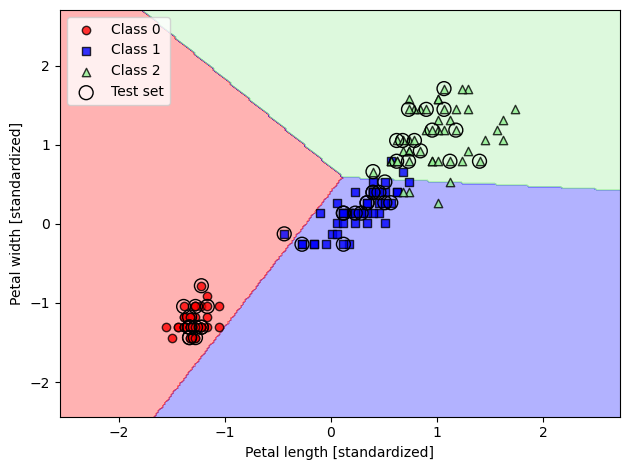

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('figures/03_01.png', dpi=300)
plt.show()

Perceptron algorithm never converges on datasets that aren't perfectly linearly separable.
Typically perceptron algorithm not recommended in practice.

## Modeling class probabilities via Logistic Regression

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/var/folders/ct/pqbzcwnd1_369hl_qttmjty00000gn/T/ipykernel_94190/2384492159.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma(z)$')


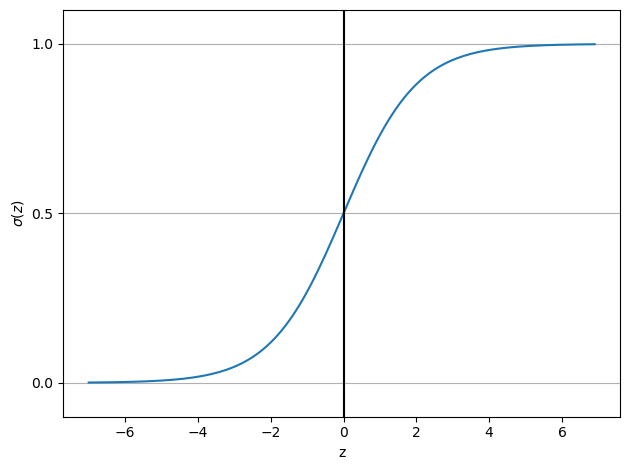

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Sigmoid function between range -7 to 7

def sigmoid(z):
    return 1.0/ (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('figures/03_02.png', dpi=300)
plt.show()

### Model Weights With Logistics Loss Function

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/var/folders/ct/pqbzcwnd1_369hl_qttmjty00000gn/T/ipykernel_94190/59158002.py:18: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma(z)$')


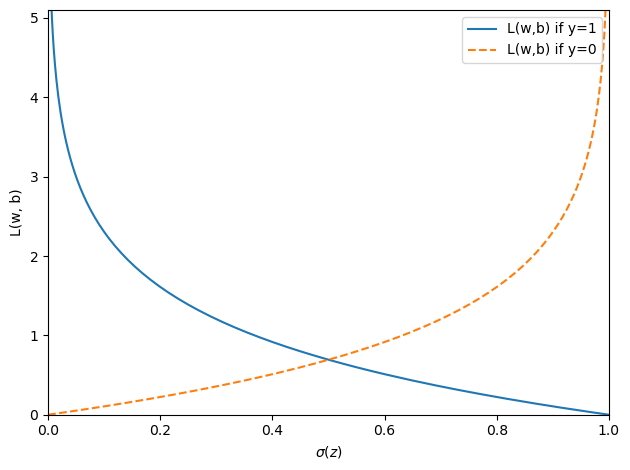

In [13]:
def loss_1(z):
    return - np.log(sigmoid(z))

def loss_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w,b) if y=1')

c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w,b) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')

plt.tight_layout()
plt.savefig('figures/03_03.png', dpi=300)
plt.show()

## Adaline for Logistic Regression

In [14]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight
        initialization.

    Attributes
    ----------
    w_ : 1d-array
        Weights after training.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
        Mean squared error loss function values in each epoch.

    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of examples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (-y.dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


When we fit a logistic regression model -> it only works for binary classification

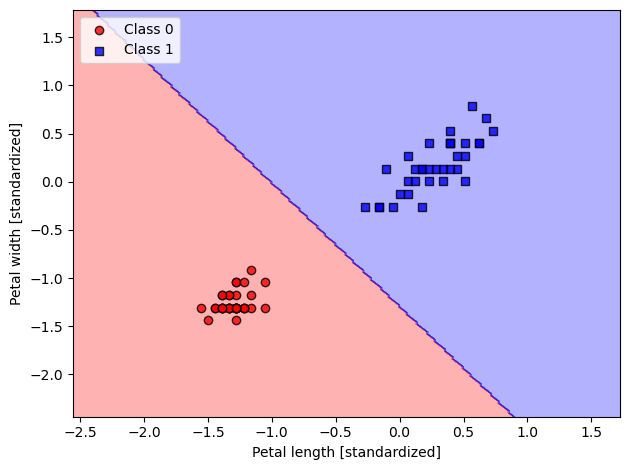

In [15]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.3,
                            n_iter=1000,
                            random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('figures/03_04.png', dpi=300)
plt.show()

## Logistic Regression with SciKit-Learn

### Multi-class as OVR

/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


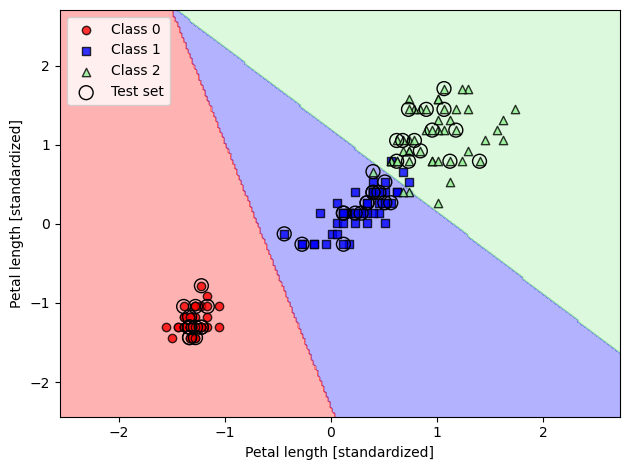

In [16]:
# multi-class as 'one-vs-rest' (OVR)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')

lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('figures/03_05.png', dpi=300)
plt.show()

### Multi-class as multinomial

/opt/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


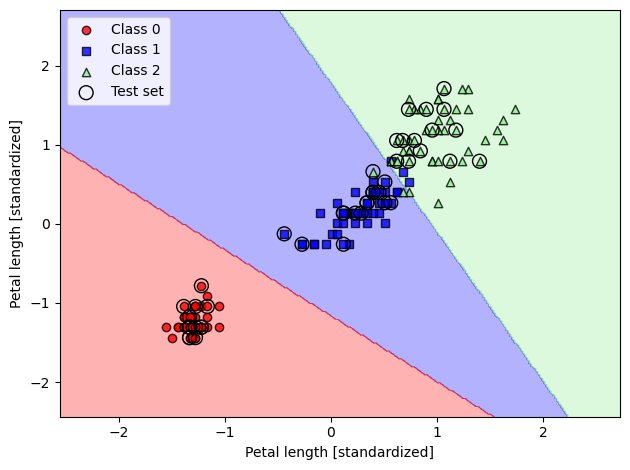

In [17]:
# multi-class as 'multinomial'
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='multinomial')

lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('figures/03_06.png', dpi=300)
plt.show()

Probability that training examples belong to a certain class - use `predict_proba` method

In [18]:
lr.predict_proba(X_test_std[:3, :])

array([[9.37368464e-13, 3.91458193e-04, 9.99608542e-01],
       [9.93631074e-01, 6.36892585e-03, 1.20730798e-15],
       [9.98707332e-01, 1.29266792e-03, 1.82177043e-17]])

- first row - class membership probabilities of the first flower
- same for the rest after it

In [19]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

Highest value is 0.85 in array. We can get index of highest value with predict_proba.argmax(axis=1)

In [20]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

more convenient way of obtaining class labels when using scikit-learn is to call `predict`

In [21]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

we do `reshape` because when you want to predict the class label of a single flower example, scikit-learn expects a 2D array; thus we use the `reshape` method to transform the 1D array into a 2D array with a single row

### Tackling overfitting via regularisation

The parameter, C, that is implemented for the LogisticRegression class in scikit-learn comes from
a convention in support vector machines, which will be the topic of the next section. The term C is inversely proportional to the regularization parameter, 𝜆 . Consequently, decreasing the value of the inverse regularization parameter, C, means that we are increasing the regularization strength

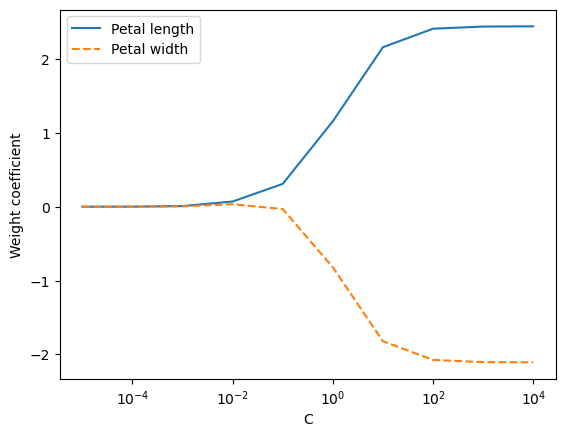

In [22]:
from sklearn.multiclass import OneVsRestClassifier

weights, params = [], []

# for c in np.arange(-5, 5):
#     lr = LogisticRegression(C=10.**c, multi_class='ovr') #multi_class depracted
#     lr.fit(X_train_std, y_train)
#     weights.append(lr.coef_[1])
#     params.append(10.**c)

for c in np.arange(-5, 5):
    # Wrap logistic regression with OneVsRestClassifier
    lr = OneVsRestClassifier(LogisticRegression(C=10.**c))
    lr.fit(X_train_std, y_train)
    # Coefficients for the second class (assuming binary classification)
    weights.append(lr.estimators_[1].coef_[0])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')

plt.savefig('figures/03_07.png', dpi=300)
plt.show()

We fitted 10 logistic regression models with different values for inverse-regularisation (C) and computed the cross-validation score for each model.

Weight coefficients shrink as C decreases, and the model complexity decreases, that is, if we increase C, the model will be more complex and the weight coefficients will be larger.

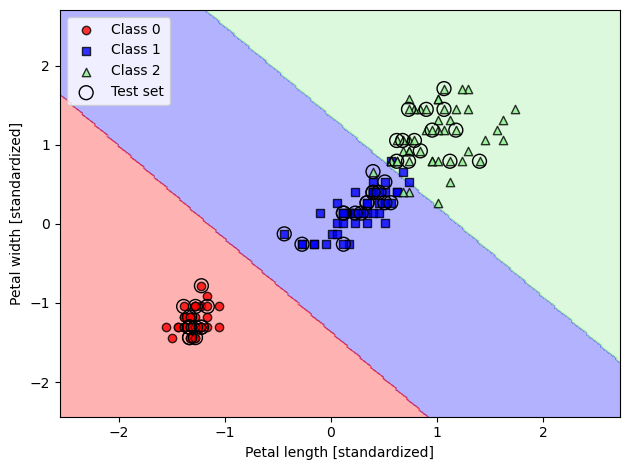

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('figures/03_08.png', dpi=300)
plt.show()